#SMS CLASSIFIER

In [ ]:
import numpy as np
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [ ]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4164,spam,"Dear Voucher Holder, To claim this weeks offer...",NaN,NaN,NaN
3792,ham,Hey are you angry with me. Reply me dr.,NaN,NaN,NaN
5517,ham,Miles and smiles r made frm same letters but d...,NaN,NaN,NaN
1480,ham,Have you always been saying welp?,NaN,NaN,NaN
5116,ham,Thanks. Fills me with complete calm and reassu...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
692,ham,"My sister in law, hope you are having a great ..."
3684,ham,Wake me up at &lt;#&gt; am morning:)
1021,spam,Guess what! Somebody you know secretly fancies...
2621,ham,Lol! Nah wasn't too bad thanks. Its good to b ...
3190,spam,UR awarded a City Break and could WIN a å£200 ...


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3409,ham,Joy's father is John. Then John is the ____ of...
1900,ham,And miss vday the parachute and double coins??...
2069,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ..."
934,spam,Dear Matthew please call 09063440451 from a la...
3089,ham,Am going to take bath ill place the key in win...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

#EDA

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

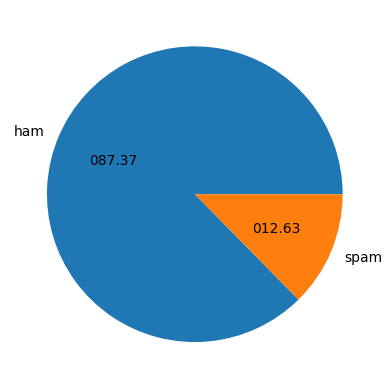

In [ ]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="0%.2f")
plt.show()

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_characters']=df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,18.455794
std,58.236293,13.324758,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,60.000000,15.000000,15.000000
75%,117.000000,26.000000,26.000000
max,910.000000,220.000000,220.000000


In [ ]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,17.123782
std,56.358207,13.493970,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,90.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [ ]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,27.667688
std,30.137753,7.008418,7.008418
min,13.000000,2.000000,2.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


<Axes: xlabel='num_characters', ylabel='Count'>

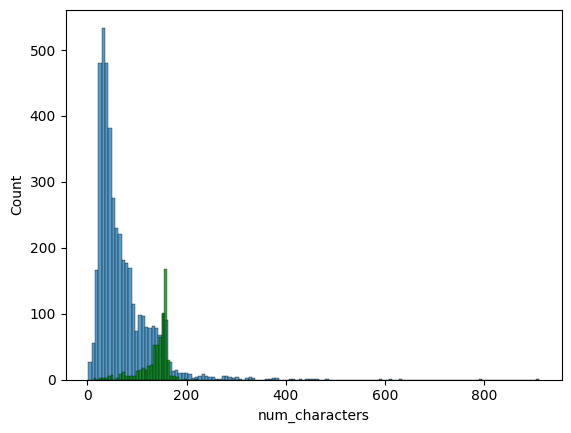

In [ ]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

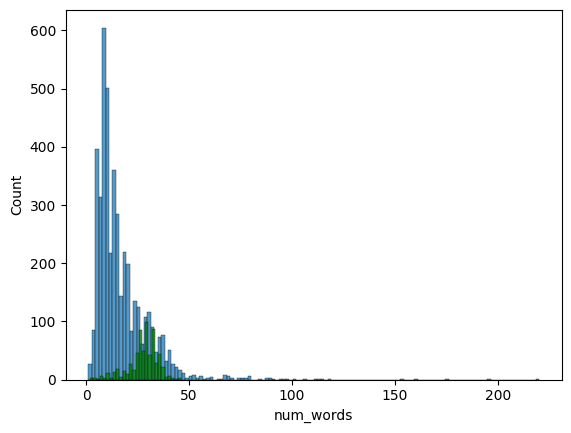

In [ ]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='green')

In [ ]:
df.corr()

<ipython-input-126-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.262912
num_characters,0.384717,1.000000,0.965760,0.965760
num_words,0.262912,0.965760,1.000000,1.000000
num_sentences,0.262912,0.965760,1.000000,1.000000


<ipython-input-127-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

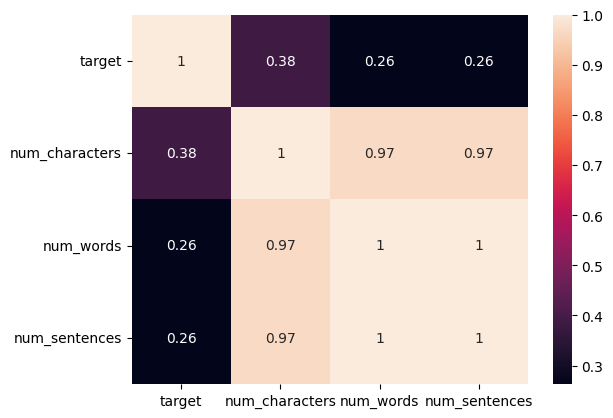

In [ ]:
sns.heatmap(df.corr(),annot=True)

#Data Preprocessing

In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
     y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('danacing')

'danac'

In [ ]:
transform_text('I loved the YT lectures on Machine learning. How about you?')

'love yt lectur machin learn'

In [ ]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('danacing')

'danac'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud


In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep=" "))

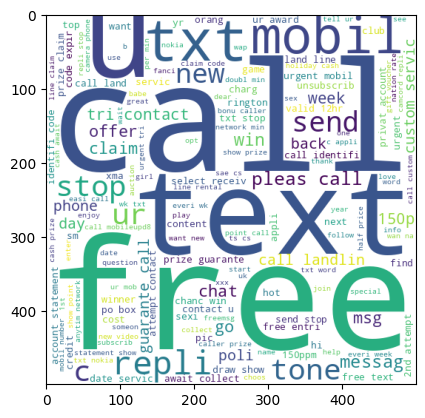

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target']== 0]['transformed_text'].str.cat(sep=" "))

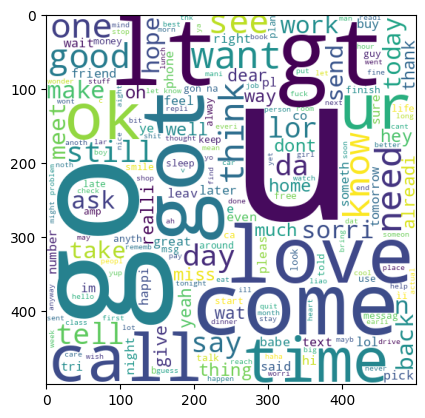

In [ ]:
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [ ]:
spam_corpus =[]
for msg in df[df['target'] ==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [ ]:
len(spam_corpus)

9939

#Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
x.shape

(5169, 6708)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [ ]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid',gamma=1.0)
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l2')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators =50,random_state=2)

In [ ]:
clfs = {
    'SVC':svc,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'Xgb':xgb
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

  current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

  print("For ",name)
  print("Accuracy- ",current_accuracy)
  print("Precision- ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy-  0.9729206963249516
Precision-  0.9741379310344828
For  DT
Accuracy-  0.9361702127659575
Precision-  0.8461538461538461
For  LR
Accuracy-  0.9477756286266924
Precision-  0.9883720930232558
For  RF
Accuracy-  0.971953578336557
Precision-  1.0
For  Xgb
Accuracy-  0.9729206963249516
Precision-  0.9435483870967742


In [ ]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy': accuracy_scores,'Precision': precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df.head()

,Algorithm,Accuracy,Precision
3,RF,0.971954,1.000000
2,LR,0.947776,0.988372
0,SVC,0.972921,0.974138
4,Xgb,0.972921,0.943548
1,DT,0.936170,0.846154


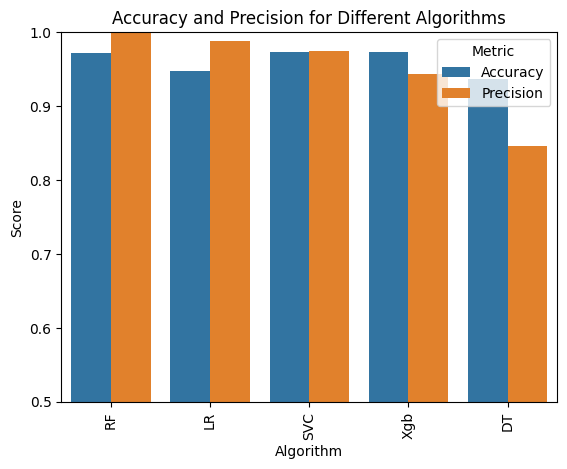

In [ ]:

# Plot
sns.barplot(x='Algorithm', y='Score', hue='Metric', data=performance_df_melted)
plt.title('Accuracy and Precision for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()